<a href="https://colab.research.google.com/github/Rajdip-projects/OIBSIP/blob/main/Car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name - Rajdip Khan
## DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE
### TASK 2
PROJECT NAME - CAR PRICE PREDICTION WITH MACHINE LEARNING


**Github Link**

In [12]:
!git clone https://github.com/Rajdip-projects/OIBSIP.git

fatal: destination path 'OIBSIP' already exists and is not an empty directory.


### Problem Statement
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

Importing Libaries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Data Preparation

In [39]:
# Load the data
data = pd.read_csv("/content/OIBSIP/Datasets/car data.csv")
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


Data Cleaning

In [40]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Display the first few rows of the cleaned data
print(data.head())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Owner  \
0     ritz  2014           3.35           5.59       27000      0   
1      sx4  2013           4.75           9.54       43000      0   
2     ciaz  2017           7.25           9.85        6900      0   
3  wagon r  2011           2.85           4.15        5200      0   
4    swift  2014           4.60           6.87       42450      0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
0             False              True                    False   
1              True             False                    False   
2             False              True                    False   
3             False              True                    False   
4              True             False                    False   

   T

Split the Data

In [41]:
# Define the feature set and target variable
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

# Display the feature set and target variable
print(X.head())
print(y.head())


   Year  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014           5.59       27000      0             False              True   
1  2013           9.54       43000      0              True             False   
2  2017           9.85        6900      0             False              True   
3  2011           4.15        5200      0             False              True   
4  2014           6.87       42450      0              True             False   

   Selling_type_Individual  Transmission_Manual  
0                    False                 True  
1                    False                 True  
2                    False                 True  
3                    False                 True  
4                    False                 True  
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


Train a Machine Learning Model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Evaluate the Model

In [44]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 1.2163740193336217
MSE: 3.4813498305146187
RMSE: 1.865837568094988
R2 Score: 0.8488707839191938


Improve the Model

In [45]:


# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Recalculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 0.5971295081967213
MSE: 0.8209857844262285
RMSE: 0.906082658716206
R2 Score: 0.9643601062650229


**Visualize the data**

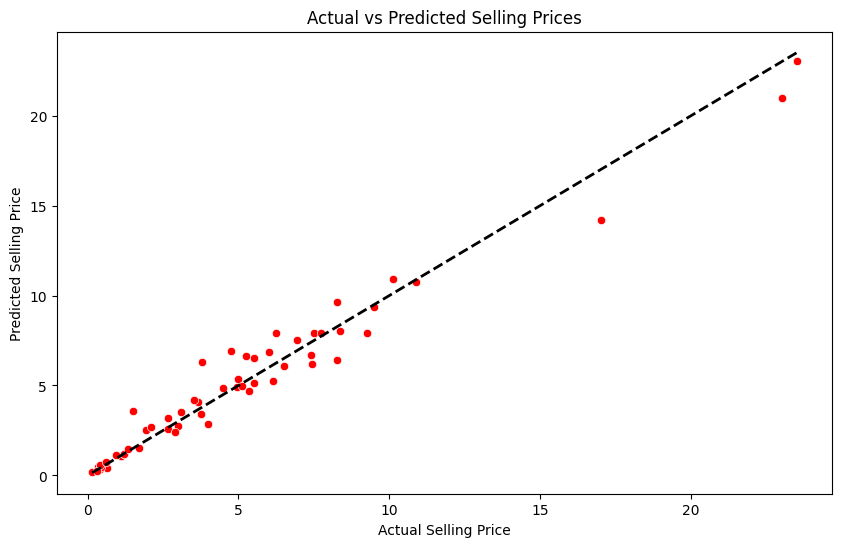

In [46]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, marker='o', color='red')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Prices')

# Show the plot
plt.show()

**Histogram**

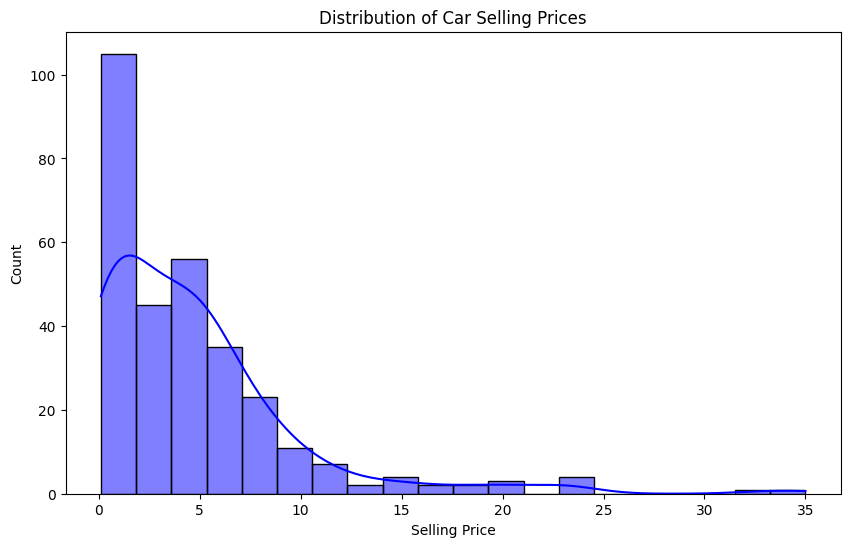

In [47]:
# Create a histogram of the selling prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=20, kde=True, color='blue')

# Add labels and title
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Distribution of Car Selling Prices')

# Show the plot
plt.show()

Heatmap

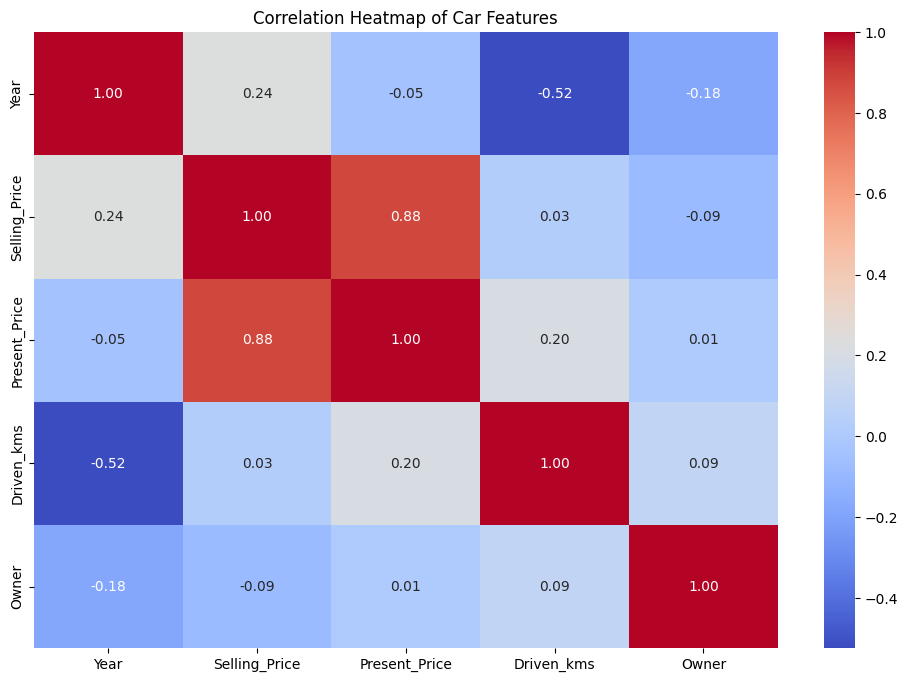

In [48]:
# Calculate the correlation matrix excluding non-numeric columns
corr_matrix = data.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Heatmap of Car Features')

# Show the plot
plt.show()

Predict a new price

In [49]:
# Create a new dataframe with the features of the car
# Use the same column names as the training data
new_car = pd.DataFrame({
    'Year': [2014],
    'Present_Price': [9.85],
    'Driven_kms': [6900], # Renamed Kms_Driven to Driven_kms
    'Owner': [0],
    'Fuel_Type_Diesel': [0],
    'Fuel_Type_Petrol': [1],
    'Selling_type_Individual': [0], # Renamed Seller_Type_Individual to Selling_type_Individual
    'Transmission_Manual': [1]
})

# Predict the price of the new car
predicted_price = model.predict(new_car)

# Print the predicted price
print(predicted_price)

[6.606]
